<a href="https://colab.research.google.com/github/diajengca/house-price-prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import tensorflow as tf

Import dataset

In [2]:
house_data = pd.read_csv('train.csv')
house_data = house_data.drop(columns=['Id'])

house_data_test = pd.read_csv('test.csv')
house_data_test = house_data_test.drop(columns=['Id'])

# Fill missing value

In [3]:
house_data = house_data.fillna(house_data.mean(skipna=True))
house_data = house_data.fillna(value="None")

house_data_test = house_data_test.fillna(house_data.mean(skipna=True))
house_data_test = house_data_test.fillna(value="None")

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
house_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Categorical Encoding

In [6]:
obj_house_data = house_data.select_dtypes(include=['object']).copy()
obj_house_data_test = house_data_test.select_dtypes(include=['object']).copy()

In [7]:
encoded_obj_house_data = pd.DataFrame()
encoded_obj_house_data_test = pd.DataFrame()

for col in obj_house_data.columns:
    enc = LabelEncoder()
    encoded_obj_house_data[col] = enc.fit_transform(obj_house_data[col])
    encoded_obj_house_data_test[col] = enc.fit_transform(obj_house_data_test[col])

In [8]:
encoded_obj_house_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,5,2,6,3,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,5,3,6,5,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,5,2,6,5,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,5,2,6,2,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,5,2,6,5,1,2,5,5,2,3,4,1,8,4


In [9]:
encoded_obj_house_data_test.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,12,1,2,0,2,1,0,11,13,2,3,4,1,4,4,3,5,3,0,4,1,3,4,7,3,1,3,4,5,2,2,2,1,9,4
1,4,1,1,0,3,0,0,0,12,2,2,0,2,3,0,12,14,1,3,4,1,4,4,3,0,6,0,4,1,3,2,7,3,1,3,4,5,2,2,4,0,9,4
2,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,11,13,2,3,4,2,2,4,3,2,6,0,2,1,3,4,7,5,1,0,4,5,2,2,2,1,9,4
3,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,11,13,1,3,4,2,4,4,3,2,6,0,0,1,3,2,7,2,1,0,4,5,2,2,4,1,9,4
4,4,1,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,2,4,2,2,4,3,0,6,0,0,1,3,2,7,3,1,2,4,5,2,2,4,1,9,4


# Scaling

In [10]:
numeric_house_data = house_data.select_dtypes(include=['int64', 'float64']).copy().drop(columns=['SalePrice'])
numeric_house_data_test = house_data_test.select_dtypes(include=['int64', 'float64']).copy()

In [11]:
normalized_numeric_house_data = pd.DataFrame()

for col in numeric_house_data.columns:
    normalized_numeric_house_data[col] = (numeric_house_data[col] - numeric_house_data[col].min()) / (numeric_house_data[col].max() - numeric_house_data[col].min())

normalized_numeric_house_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [12]:
normalized_numeric_house_data_test = pd.DataFrame()

for col in numeric_house_data_test.columns:
    normalized_numeric_house_data_test[col] = (numeric_house_data_test[col] - numeric_house_data_test[col].min()) / (numeric_house_data_test[col].max() - numeric_house_data_test[col].min())

normalized_numeric_house_data_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.000000,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,0.126168,0.173111,0.104309,0.000000,0.0,0.104309,0.0,0.0,0.25,0.0,0.333333,0.5,0.166667,0.00,0.211538,0.2,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0
1,0.000000,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,0.189720,0.260844,0.196672,0.000000,0.0,0.196672,0.0,0.0,0.25,0.5,0.500000,0.5,0.250000,0.00,0.201923,0.2,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0
2,0.235294,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,0.064019,0.182139,0.111135,0.376477,0.0,0.260666,0.0,0.0,0.50,0.5,0.500000,0.5,0.250000,0.25,0.326923,0.4,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0
3,0.235294,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,0.151402,0.181747,0.110708,0.364125,0.0,0.255333,0.0,0.0,0.50,0.5,0.500000,0.5,0.333333,0.25,0.330128,0.4,0.315860,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0
4,0.588235,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,0.475234,0.251227,0.186220,0.000000,0.0,0.186220,0.0,0.0,0.50,0.0,0.333333,0.5,0.166667,0.00,0.310897,0.4,0.340054,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0


In [13]:
house_data_train = encoded_obj_house_data.join(normalized_numeric_house_data).join(house_data['SalePrice'])
house_data_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,5,2,6,3,1,2,5,5,2,3,4,1,8,4,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,208500
1,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,5,3,6,5,1,2,5,5,2,3,4,1,8,4,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,181500
2,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,5,2,6,5,1,2,5,5,2,3,4,1,8,4,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,223500
3,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,5,2,6,2,5,3,5,5,2,3,4,1,8,0,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,140000
4,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,5,2,6,5,1,2,5,5,2,3,4,1,8,4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,250000


In [14]:
house_data_testset = encoded_obj_house_data_test.join(normalized_numeric_house_data_test)
house_data_testset.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3,1,1,3,3,0,4,0,12,1,2,0,2,1,0,11,13,2,3,4,1,4,4,3,5,3,0,4,1,3,4,7,3,1,3,4,5,2,2,2,1,9,4,0.000000,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,0.126168,0.173111,0.104309,0.000000,0.0,0.104309,0.0,0.0,0.25,0.0,0.333333,0.5,0.166667,0.00,0.211538,0.2,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0
1,4,1,1,0,3,0,0,0,12,2,2,0,2,3,0,12,14,1,3,4,1,4,4,3,0,6,0,4,1,3,2,7,3,1,3,4,5,2,2,4,0,9,4,0.000000,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,0.189720,0.260844,0.196672,0.000000,0.0,0.196672,0.0,0.0,0.25,0.5,0.500000,0.5,0.250000,0.00,0.201923,0.2,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0
2,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,11,13,2,3,4,2,2,4,3,2,6,0,2,1,3,4,7,5,1,0,4,5,2,2,2,1,9,4,0.235294,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,0.064019,0.182139,0.111135,0.376477,0.0,0.260666,0.0,0.0,0.50,0.5,0.500000,0.5,0.250000,0.25,0.326923,0.4,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0
3,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,11,13,1,3,4,2,4,4,3,2,6,0,0,1,3,2,7,2,1,0,4,5,2,2,4,1,9,4,0.235294,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,0.151402,0.181747,0.110708,0.364125,0.0,0.255333,0.0,0.0,0.50,0.5,0.500000,0.5,0.333333,0.25,0.330128,0.4,0.315860,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0
4,4,1,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,2,4,2,2,4,3,0,6,0,0,1,3,2,7,3,1,2,4,5,2,2,4,1,9,4,0.588235,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,0.475234,0.251227,0.186220,0.000000,0.0,0.186220,0.0,0.0,0.50,0.0,0.333333,0.5,0.166667,0.00,0.310897,0.4,0.340054,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0


# Train using Tensorflow Neural Network

In [15]:
X_train = house_data_train.drop(columns=['SalePrice'])
y_train = house_data_train['SalePrice']

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=[79]),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

history = model.fit(X_train, y_train, epochs=500, verbose=False)

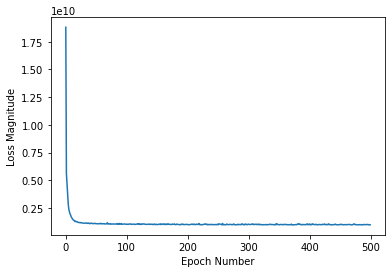

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# Generate prediction

According to Kaggle, this prediction has 0.33970 Root-Mean-Squared-Error (RMSE)

In [23]:
y_pred = model.predict(house_data_testset)
print(y_pred)

[[105375.75]
 [168094.97]
 [171817.48]
 ...
 [151096.25]
 [119625.7 ]
 [243451.64]]


In [24]:
y_pred = [y[0] for y in y_pred]
prediction_result = pd.DataFrame()
prediction_result['SalePrice'] = y_pred
prediction_result.head()
prediction_result.to_csv('prediction.csv', index=False)